In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, HalvingGridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import os
# os.chdir("/content/drive/MyDrive/IS4303")
# !ls
%cd drive/MyDrive/IS4303/notebooks/new_cleaned

/content/drive/MyDrive/IS4303/notebooks/new_cleaned


# Load train test dataset

In [ ]:
X_train = pd.read_csv('./5X_train.csv')
X_test = pd.read_csv('./4X_test.csv')
y_train = pd.read_csv('./5y_train.csv')
y_test = pd.read_csv('./4y_test.csv')

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train['is_canceled']
y_test = y_test['is_canceled']

# Random Forest

## random search

In [ ]:
rf = RandomForestClassifier()
param_dist = {'n_estimators': [200, 300, 500, 1000],
        'max_depth': [5, 10, 15, 20, 30]}
rand_search = RandomizedSearchCV(rf,param_distributions = param_dist,n_iter=5,cv=5)
rand_search.fit(X_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 338}


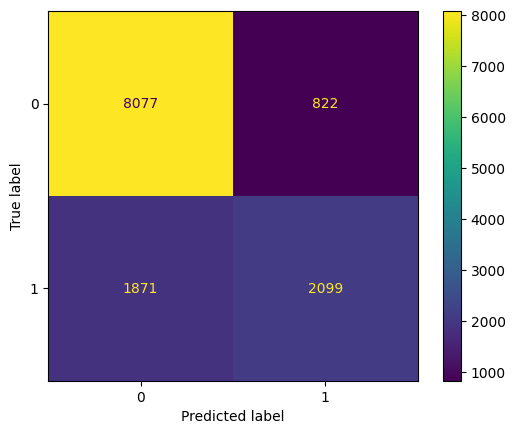

In [ ]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", F1)
print("AUC_ROC:", auc_roc)

Accuracy: 0.7907374310358225
Precision: 0.71858952413557
Recall: 0.5287153652392947
F1: 0.6092004063270934
AUC_ROC: 0.7181727180168831


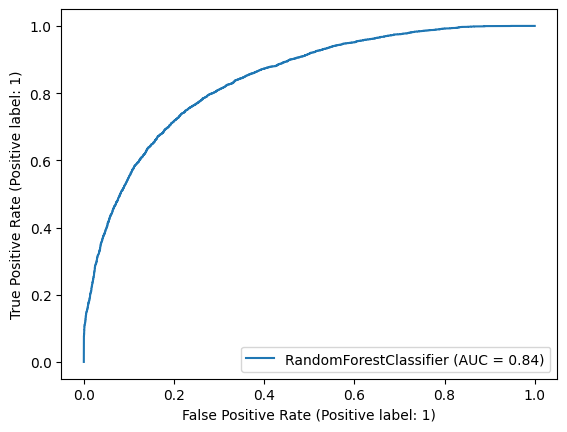

In [ ]:
rf_disp = RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.show()

## grid search

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'max_features': [None, 'log2', 'sqrt'], 
    'min_samples_leaf': [1, 2, 4], 
    'min_samples_split': [2, 5, 10], 
    'n_estimators': [200] 
}

In [9]:
rf = RandomForestClassifier()
grid_search = HalvingGridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, random_state=123, verbose=10)
grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 880
max_resources_: 71340
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 135
n_resources: 880
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 1
n_candidates: 45
n_resources: 2640
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 2
n_candidates: 15
n_resources: 7920
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 5
n_resources: 23760
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 71280
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'max_depth': [3, 5, 10, 15, None],
                                'max_features': [None, 'log2', 'sqrt'],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5, 10],
                                'n_estimators': [200]},
                    random_state=123, scoring='f1', verbose=10)

In [10]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [11]:
params = grid_search.best_params_
rf = RandomForestClassifier(**params).fit(X_train, y_train)

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score

def plot_preds(preds, probas, truth):
  auc_score = roc_auc_score(truth, probas)
  prec = precision_score(truth, preds)
  rec = recall_score(truth, preds)
  f1 = f1_score(truth, preds)
  print(f"AUC: {auc_score:.2f}\n")
  print(f'Precision: {prec:.2f}')
  print(f'Recall: {rec:.2f}')
  print(f"F1: {f1:.2f}\n")

  fpr, tpr, thresholds = roc_curve(truth, probas)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

AUC: 0.84

Precision: 0.64
Recall: 0.65
F1: 0.64



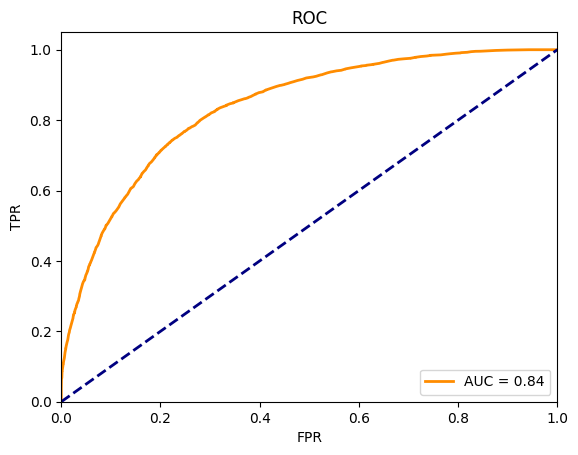

In [13]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

In [14]:
y_pred_train = rf.predict_proba(X_train)[:,1]
y_pred_test = rf.predict_proba(X_test)[:,1]

In [15]:
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

In [16]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

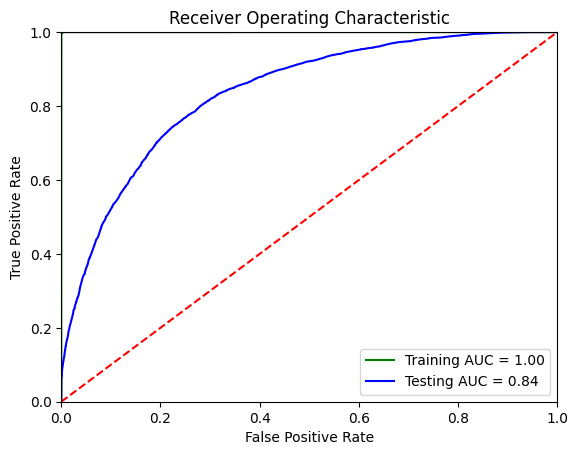

In [17]:
plot_roc_curve(roc_auc_train, roc_auc_test)